In [1]:
import csv,statistics,random,math
import matplotlib.pyplot as plt
random.seed(9999)

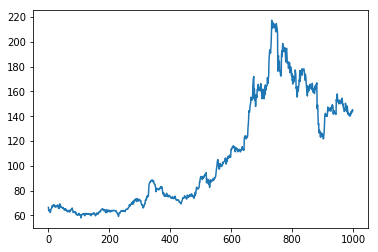

In [2]:
coke='/Users/cewang/Desktop/COKE-2.csv'
csvreader=csv.reader(open(coke))
pcoke=[]
for item in csvreader:
    if item!=[]:
        pcoke.append(item[4])
pcoke=pcoke[1:len(pcoke)]
coke=[]
for i in range(len(pcoke)):
    coke.append(float(pcoke[i]))
returns=[]
for i in range(1,len(coke)):
    returns.append(math.log(coke[i]/coke[i-1]))
mu=(statistics.mean(returns))*252
sigma=(statistics.stdev(returns))*math.sqrt(252)
S=[coke[-1]]
testcoke=coke[1000:]
coke=coke[:1000]
plt.plot(coke)
plt.show()

In [3]:
def volatility(data):
    v=[0,0,0,0,0]
    for i in range(5,len(data)):
        lst=[data[i-5],data[i-4],data[i-3],data[i-2],data[i-1],data[i]]
        returns=[(lst[1]/lst[0])-1,(lst[2]/lst[1])-1,(lst[3]/lst[2])-1,(lst[4]/lst[3])-1,(lst[5]/lst[4])-1]
        v.append(statistics.stdev(returns))
    dv=[]
    for item in v:
        if item<=statistics.median(v):
            dv.append(0)
        else:
            dv.append(1)
    return dv


In [4]:
def convert_to_signal(data):
    signal=[0]
    for i in range(len(data)-1):
        signal.append(data[i+1]-data[i])
    return signal

In [5]:
def signal_discritize(signal):
    discritized=[]
    for item in signal:
        if item>0:
            discritized.append(0)
        else:
            discritized.append(1)
    return discritized

In [6]:
def dsignal_classifier(ds,dv):
    conditions=['null','null','null']
    for i in range(3,len(ds)):
        conditions.append(int(str(ds[i-3])+str(ds[i-2])+str(ds[i-1])+str(ds[i])+str(dv[i]),2))
    return conditions

In [7]:
def randommax_index(Q_row):
    maximum=max(Q_row)
    maxlist=[]
    for i in range(len(Q_row)):
        if Q_row[i] == maximum:
            maxlist.append(i)
    if len(maxlist) == 0:
        return maxlist[0]
    else:
        return random.choice(maxlist)

In [8]:
Q=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]


In [9]:
def prob(exploration_probability):
    return random.uniform(0,1)<=exploration_probability

In [10]:
dv=volatility(coke)
learning_curve=[]
def train_once(data,Q):
    totalR=0
    Q_update=Q
    disignal=signal_discritize(convert_to_signal(data))
    conditions=dsignal_classifier(disignal,dv)
    for i in range(4,len(data)-1):
        state=conditions[i]
        exploration_probability=1/i
        explore=prob(exploration_probability)
        if explore==False:
            action=randommax_index(Q_update[state])
        else:
            action=random.sample([0,1],1)[0]
        if action==0:
            R=1
        elif action==1:
            R=data[i+1]/data[i]
        reward=R
        reward=reward+0.9*max(Q_update[conditions[i+1]])
        Q_update[state][action]=Q_update[state][action]*(1-(1/i))+reward*(1/i)
        totalR+=reward
    learning_curve.append(totalR)

In [11]:
tdv=volatility(testcoke)
def test(data,Q):
    disignal=signal_discritize(convert_to_signal(data))
    conditions=dsignal_classifier(disignal,tdv)
    portfolio=10000
    path=[10000,10000,10000,10000]
    actions=[]
    for i in range(3,len(data)-1):
        state=conditions[i]
        action=randommax_index(Q[state])
        actions.append(action)
        value=portfolio*action
        cash=portfolio-value
        shares=value/data[i]
        investresult=shares*data[i+1]
        portfolio=investresult+cash
        path.append(portfolio)
    plt.plot(actions)
    plt.show()
    return path

In [12]:
def policy(Q):
    P=[]
    for item in Q:
        if item[0] > item[1]:
            P.append([1,0])
        else:
            P.append([0,1])
    return P

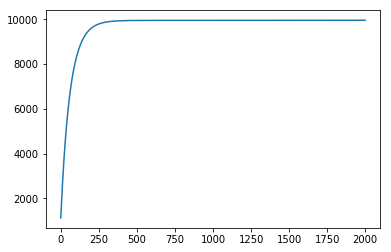

In [13]:
for i in range(2000):
    train_once(coke,Q)
plt.plot(learning_curve)
plt.show()
    

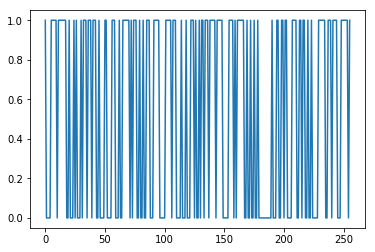

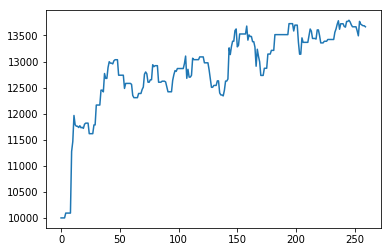

In [14]:
testingpath=test(testcoke,Q)
plt.plot(testingpath)
plt.show()


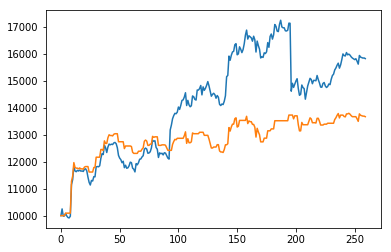

In [15]:
ratio=10000/testcoke[0]
for i in range(len(testcoke)):
    testcoke[i]=testcoke[i]*ratio
plt.plot(testcoke)
plt.plot(testingpath)
plt.show()


